In [15]:
#Import Libraries 

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '322004da-fa46-4d04-8c00-e92fdccf765f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  
#iN ORDER TO Ffix the Data rate error please use: 
#This command on the terminal jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

{'status': {'timestamp': '2022-12-06T06:08:12.433Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 8962}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9864, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
#Transform data from Json into a data frame
type(data)


dict

In [16]:
import pandas as pd

pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9864,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.922560e+07,1.922560e+07,NaN,1,NaN,NaN,None,2022-12-06T06:05:00.000Z,16989.404436,1.964022e+10,-1.5429,-0.151044,-1.995765,3.073021,-19.752173,-14.923066,-9.429090,3.266315e+11,38.3238,3.567775e+11,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6254,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-06T06:05:00.000Z,1258.823674,5.537553e+09,0.5373,-0.283434,-2.962921,4.243224,-22.176428,-7.090797,-16.941547,1.540471e+11,18.0736,1.540471e+11,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,44160,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.557672e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-06T06:05:00.000Z,1.000117,2.634588e+10,6.7095,0.004886,-0.000892,0.047929,0.005240,-0.001592,0.001558,6.558439e+10,7.6934,7.315033e+10,None,2022-12-06T06:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599695e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-12-06T06:05:00.000Z,288.914041,6.376645e+08,-12.8960,-0.223393,-2.624833,-4.735446,-17.277840,1.640295,9.746039,4.621743e+10,5.4227,5.778281e+10,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,8677,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.312873e+10,4.312873e+10,NaN,5,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.999946,2.118150e+09,11.9739,0.001354,-0.009406,-0.021840,-0.009808,-0.000398,-0.009967,4.312642e+10,5.0598,4.312642e+10,None,2022-12-06T06:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,4687,Binance USD,BUSD,binance-usd,5676,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.210009e+10,2.210009e+10,NaN,6,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.999747,5.320292e+09,4.4800,-0.027126,-0.034738,-0.058038,-0.058488,-0.033532,-0.108529,2.209449e+10,2.5924,2.209449e+10,None,2022-12-06T06:05:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1
6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.026045e+10,9.998920e+10,NaN,7,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.383922,8.996317e+08,52.6398,0.193852,-2.623631,-1.990179,-21.469651,-21.545068,21.108383,1.929608e+10,2.2637,3.839218e+10,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN
7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.100678,1.011508e+09,48.1640,-0.856086,-3.676550,-2.467009,-19.022994,58.738249,71.131122,1.335700e+10,1.5672,1.335700e+10,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,603,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.445930e+10,3.521226e+10,NaN,9,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.318655,1.851622e+08,0.4704,-0.178960,-2.314085,2.413071,-24.406967,-25.555985,-30.807076,1.098062e+10,1.2884,1.433946e+10,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN
9,3890,Polygon

In [17]:
#Diplay all the columns 
pd.set_option('display.max_columns',None)
df = pd.json_normalize(data['data'])

In [18]:
df['timestamp']= pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9864,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.922560e+07,1.922560e+07,NaN,1,NaN,NaN,None,2022-12-06T06:05:00.000Z,16989.404436,1.964022e+10,-1.5429,-0.151044,-1.995765,3.073021,-19.752173,-14.923066,-9.429090,3.266315e+11,38.3238,3.567775e+11,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
1,1027,Ethereum,ETH,ethereum,6254,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-12-06T06:05:00.000Z,1258.823674,5.537553e+09,0.5373,-0.283434,-2.962921,4.243224,-22.176428,-7.090797,-16.941547,1.540471e+11,18.0736,1.540471e+11,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
2,825,Tether,USDT,tether,44160,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.557672e+10,7.314177e+10,NaN,3,NaN,NaN,None,2022-12-06T06:05:00.000Z,1.000117,2.634588e+10,6.7095,0.004886,-0.000892,0.047929,0.005240,-0.001592,0.001558,6.558439e+10,7.6934,7.315033e+10,None,2022-12-06T06:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-06 06:08:25.757574+00:00
3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599695e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-12-06T06:05:00.000Z,288.914041,6.376645e+08,-12.8960,-0.223393,-2.624833,-4.735446,-17.277840,1.640295,9.746039,4.621743e+10,5.4227,5.778281e+10,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
4,3408,USD Coin,USDC,usd-coin,8677,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.312873e+10,4.312873e+10,NaN,5,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.999946,2.118150e+09,11.9739,0.001354,-0.009406,-0.021840,-0.009808,-0.000398,-0.009967,4.312642e+10,5.0598,4.312642e+10,None,2022-12-06T06:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-06 06:08:25.757574+00:00
5,4687,Binance USD,BUSD,binance-usd,5676,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.210009e+10,2.210009e+10,NaN,6,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.999747,5.320292e+09,4.4800,-0.027126,-0.034738,-0.058038,-0.058488,-0.033532,-0.108529,2.209449e+10,2.5924,2.209449e+10,None,2022-12-06T06:05:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-12-06 06:08:25.757574+00:00
6,52,XRP,XRP,xrp,854,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.026045e+10,9.998920e+10,NaN,7,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.383922,8.996317e+08,52.6398,0.193852,-2.623631,-1.990179,-21.469651,-21.545068,21.108383,1.929608e+10,2.2637,3.839218e+10,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
7,74,Dogecoin,DOGE,dogecoin,608,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.100678,1.011508e+09,48.1640,-0.856086,-3.676550,-2.467009,-19.022994,58.738249,71.131122,1.335700e+10,1.5672,1.335700e+10,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
8,2010,Cardano,ADA,cardano,603,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract..

In [27]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '322004da-fa46-4d04-8c00-e92fdccf765f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp']= pd.to_datetime('now', utc=True)
    df = df.append(df2)
    
    if not os.path.isfile('/home/titanicdwarf/Documents/Data Analysis projects/Python/ApiCryptoAutomater/api.csv'):
        df.to_csv('/home/titanicdwarf/Documents/Data Analysis projects/Python/ApiCryptoAutomater/api.csv', header='column_names')
    else: 
         df.to_csv('/home/titanicdwarf/Documents/Data Analysis projects/Python/ApiCryptoAutomater/api.csv', mode='a', header=False)

In [29]:
#Check the appended data
df4 = pd.read_csv('/home/titanicdwarf/Documents/Data Analysis projects/Python/ApiCryptoAutomater/api.csv')
df4

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9864,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.922560e+07,1.922560e+07,NaN,1,NaN,NaN,NaN,2022-12-06T06:05:00.000Z,16989.404436,1.964022e+10,-1.5429,-0.151044,-1.995765,3.073021,-19.752173,-14.923066,-9.429090,3.266315e+11,38.3238,3.567775e+11,NaN,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
1,1,1027,Ethereum,ETH,ethereum,6254,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-12-06T06:05:00.000Z,1258.823674,5.537553e+09,0.5373,-0.283434,-2.962921,4.243224,-22.176428,-7.090797,-16.941547,1.540471e+11,18.0736,1.540471e+11,NaN,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
2,2,825,Tether,USDT,tether,44160,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.557672e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2022-12-06T06:05:00.000Z,1.000117,2.634588e+10,6.7095,0.004886,-0.000892,0.047929,0.005240,-0.001592,0.001558,6.558439e+10,7.6934,7.315033e+10,NaN,2022-12-06T06:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-06 06:08:25.757574+00:00
3,3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.0,1.599695e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-12-06T06:05:00.000Z,288.914041,6.376645e+08,-12.8960,-0.223393,-2.624833,-4.735446,-17.277840,1.640295,9.746039,4.621743e+10,5.4227,5.778281e+10,NaN,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
4,4,3408,USD Coin,USDC,usd-coin,8677,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.312873e+10,4.312873e+10,NaN,5,NaN,NaN,NaN,2022-12-06T06:05:00.000Z,0.999946,2.118150e+09,11.9739,0.001354,-0.009406,-0.021840,-0.009808,-0.000398,-0.009967,4.312642e+10,5.0598,4.312642e+10,NaN,2022-12-06T06:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-06 06:08:25.757574+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,10,6636,Polkadot,DOT,polkadot-new,435,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.143970e+09,1.259993e+09,NaN,11,904869778.0,4.964473e+09,NaN,2022-12-06T08:46:00.000Z,5.486395,1.599235e+08,2.8262,0.043986,-4.093532,3.594435,-22.125035,-13.993009,-21.342818,6.276270e+09,0.7358,6.912821e+09,NaN,2022-12-06T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 08:47:35.703645+00:00
146,11,2,Litecoin,LTC,litecoin,851,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.0,7.176846e+07,8.400000e+07,NaN,12,NaN,NaN,NaN,2022-12-06T08:46:00.000Z,80.242272,7.168296e+08,4.9992,-0.435011,-4.222375,4.590407,14.493180,49.529635,47.660384,5.758864e+09,0.6751,6.740351e+09,NaN,2022-12-06T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 08:47:35.703645+00:00
147,12,4943,Dai,DAI,multi-collateral-dai,1700,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,5.685538e+09,5.685538e+09,NaN,13,NaN,NaN,NaN,2022-12-06T08:46:00.000Z,0.999840,1.732243e+08,-3.2164,0.004468,-0.052443,-0.098103,-0.076075,-0.014649,-0.031378,5.684628e+09,0.6663,5.684628e+

In [28]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("Api Runner completed Successfully")
    sleep(60) #Sleep for 1 minute
exit()

{'status': {'timestamp': '2022-12-06T08:47:35.517Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 8962}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9864, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

/tmp/ipykernel_118488/3401417826.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


Api Runner completed Successfully


KeyboardInterrupt: 

In [30]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [31]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9864,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19225600.00000,19225600.00000,NaN,1,NaN,NaN,None,2022-12-06T06:05:00.000Z,16989.40444,19640215677.13359,-1.54290,-0.15104,-1.99576,3.07302,-19.75217,-14.92307,-9.42909,326631493919.01184,38.32380,356777493149.71997,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
1,1027,Ethereum,ETH,ethereum,6254,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2022-12-06T06:05:00.000Z,1258.82367,5537553230.34991,0.53730,-0.28343,-2.96292,4.24322,-22.17643,-7.09080,-16.94155,154047119814.67413,18.07360,154047119814.67001,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
2,825,Tether,USDT,tether,44160,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65576715611.09682,73141766321.23428,NaN,3,NaN,NaN,None,2022-12-06T06:05:00.000Z,1.00012,26345879632.26475,6.70950,0.00489,-0.00089,0.04793,0.00524,-0.00159,0.00156,65584392166.52684,7.69340,73150328458.24001,None,2022-12-06T06:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-12-06 06:08:25.757574+00:00
3,1839,BNB,BNB,bnb,1149,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159969498.63399,159979963.59043,NaN,4,NaN,NaN,None,2022-12-06T06:05:00.000Z,288.91404,637664534.11132,-12.89600,-0.22339,-2.62483,-4.73545,-17.27784,1.64030,9.74604,46217434330.16986,5.42270,57782808253.86000,None,2022-12-06T06:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 06:08:25.757574+00:00
4,3408,USD Coin,USDC,usd-coin,8677,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43128733793.06586,43128733793.06586,NaN,5,NaN,NaN,None,2022-12-06T06:05:00.000Z,0.99995,2118149839.42283,11.97390,0.00135,-0.00941,-0.02184,-0.00981,-0.00040,-0.00997,43126420358.97742,5.05980,43126420358.98000,None,2022-12-06T06:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-12-06 06:08:25.757574+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,435,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1143969739.30935,1259993409.61453,NaN,11,904869778.00000,4964472860.22543,None,2022-12-06T08:46:00.000Z,5.48639,159923470.02715,2.82620,0.04399,-4.09353,3.59443,-22.12503,-13.99301,-21.34282,6276269648.73662,0.73580,6912821312.17000,None,2022-12-06T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 08:47:35.703645+00:00
11,2,Litecoin,LTC,litecoin,851,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.00000,71768456.22724,84000000.00000,NaN,12,NaN,NaN,None,2022-12-06T08:46:00.000Z,80.24227,716829594.92555,4.99920,-0.43501,-4.22238,4.59041,14.49318,49.52964,47.66038,5758863982.46064,0.67510,6740350844.32000,None,2022-12-06T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-12-06 08:47:35.703645+00:00
12,4943,Dai,DAI,multi-collateral-dai,1700,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5685537791.55644,5685537791.55644,NaN,13,NaN,NaN,None,2022-12-06T08:46:00.000Z,0

In [54]:
df3 =df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d' ]].mean()

In [34]:
df5 = df3.stack()
df5

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.06852
         quote.USD.percent_change_24h    -2.07054
         quote.USD.percent_change_7d      3.08272
         quote.USD.percent_change_30d   -19.78500
         quote.USD.percent_change_60d   -14.91576
                                           ...   
Solana   quote.USD.percent_change_24h     0.34278
         quote.USD.percent_change_7d      2.45768
         quote.USD.percent_change_30d   -60.79346
         quote.USD.percent_change_60d   -57.81175
         quote.USD.percent_change_90d   -54.71194
Length: 90, dtype: float64

In [37]:
df6 = df5.to_frame(name='values')
df6

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.06852
        quote.USD.percent_change_24h  -2.07054
        quote.USD.percent_change_7d    3.08272
        quote.USD.percent_change_30d -19.78500
        quote.USD.percent_change_60d -14.91576
...                                        ...
Solana  quote.USD.percent_change_24h   0.34278
        quote.USD.percent_change_7d    2.45768
        quote.USD.percent_change_30d -60.79346
        quote.USD.percent_change_60d -57.81175
        quote.USD.percent_change_90d -54.71194

[90 rows x 1 columns]

In [42]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06852
1,Bitcoin,quote.USD.percent_change_24h,-2.07054
2,Bitcoin,quote.USD.percent_change_7d,3.08272
3,Bitcoin,quote.USD.percent_change_30d,-19.78500
4,Bitcoin,quote.USD.percent_change_60d,-14.91576
...,...,...,...
85,Solana,quote.USD.percent_change_24h,0.34278
86,Solana,quote.USD.percent_change_7d,2.45768
87,Solana,quote.USD.percent_change_30d,-60.79346
88,Solana,quote.USD.percent_change_60d,-57.81175


In [47]:
df8 = df7.rename(columns= {'level_1': 'Percent_change'})
df8

,name,Percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06852
1,Bitcoin,quote.USD.percent_change_24h,-2.07054
2,Bitcoin,quote.USD.percent_change_7d,3.08272
3,Bitcoin,quote.USD.percent_change_30d,-19.78500
4,Bitcoin,quote.USD.percent_change_60d,-14.91576
...,...,...,...
85,Solana,quote.USD.percent_change_24h,0.34278
86,Solana,quote.USD.percent_change_7d,2.45768
87,Solana,quote.USD.percent_change_30d,-60.79346
88,Solana,quote.USD.percent_change_60d,-57.81175


In [56]:
df8['Percent_change']= df8['Percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])
df8

,name,Percent_change,values
0,Bitcoin,1h,-0.06852
1,Bitcoin,24h,-2.07054
2,Bitcoin,7d,3.08272
3,Bitcoin,30d,-19.78500
4,Bitcoin,60d,-14.91576
...,...,...,...
85,Solana,24h,0.34278
86,Solana,7d,2.45768
87,Solana,30d,-60.79346
88,Solana,60d,-57.81175


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

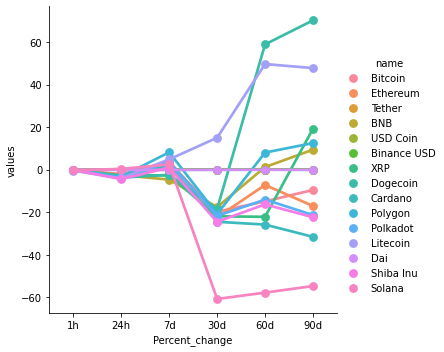

In [57]:
sns.catplot(x='Percent_change', y='values', hue='name', data=df8, kind='point' )

In [60]:
df9= df[['name','quote.USD.price','timestamp']]
df10 = df9.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,16989.40444,2022-12-06 06:08:25.757574+00:00
0,Bitcoin,17010.21102,2022-12-06 08:34:55.410146+00:00
0,Bitcoin,16997.84959,2022-12-06 08:35:56.264509+00:00
0,Bitcoin,16996.91318,2022-12-06 08:36:54.776907+00:00
0,Bitcoin,16997.91747,2022-12-06 08:37:56.262915+00:00
0,Bitcoin,16995.43036,2022-12-06 08:38:57.015056+00:00
0,Bitcoin,16996.78455,2022-12-06 08:39:57.845565+00:00
0,Bitcoin,16997.62261,2022-12-06 08:40:58.504179+00:00
0,Bitcoin,16999.92458,2022-12-06 08:42:00.418807+00:00
0,Bitcoin,17019.32032,2022-12-06 08:47:35.703645+00:00
